### Business Objective :
The companies have approached the advertising agency to plan and execute ad campaigns that will help them increase the footfall in their stores.The objective is to predict the revenue generated will cover costs to produce and air the ad(Whether there will be a net gain from an ad or not).Thus, this would help the companies to decide wheterht o pusue with such ad compaigns or not.

Data Science Objective : This clearly indicates that it is a binary classification problem where we can use different algorithm such as logistic regression to predict whether there will be net gain or not.


### Step1 : Read and Inspect the data

In [173]:
# import the necessary libraries and then read the train and the test data
import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [174]:
df_train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [175]:
df_train.shape

(19536, 12)

In [176]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             19536 non-null  object 
 1   realtionship_status                19536 non-null  object 
 2   industry                           19536 non-null  object 
 3   genre                              19536 non-null  object 
 4   targeted_sex                       19536 non-null  object 
 5   average_runtime(minutes_per_week)  19536 non-null  int64  
 6   airtime                            19536 non-null  object 
 7   airlocation                        19536 non-null  object 
 8   ratings                            19536 non-null  float64
 9   expensive                          19536 non-null  object 
 10  money_back_guarantee               19536 non-null  object 
 11  netgain                            19536 non-null  int

In [177]:
df_train.columns

Index(['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [178]:
df_train.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


In [179]:
## Lets inspect the test data
df_test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [180]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             6512 non-null   object 
 1   realtionship_status                6512 non-null   object 
 2   industry                           6512 non-null   object 
 3   genre                              6512 non-null   object 
 4   targeted_sex                       6512 non-null   object 
 5   average_runtime(minutes_per_week)  6512 non-null   int64  
 6   airtime                            6512 non-null   object 
 7   airlocation                        6512 non-null   object 
 8   ratings                            6512 non-null   float64
 9   expensive                          6512 non-null   object 
 10  money_back_guarantee               6512 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 559.8+ 

In [181]:
df_test.shape

(6512, 11)

### Step 2 : Identifying and Handling the missing values

In [182]:
df_train.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

The above table clearly reflects that there are no missing values. Thus, we can proceed with the further analysis.

### Step 3 : Univariate and Bivariate Analysis

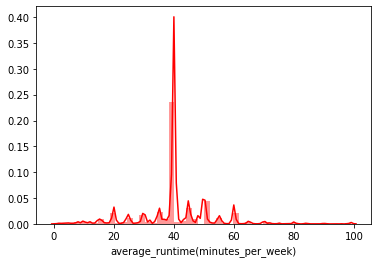

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(df_train['average_runtime(minutes_per_week)'], hist = True , color = 'r')

The above graph indicates that the average run time of advertisement is 40 mins per week.

In [184]:
df_train.columns

Index(['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [185]:
# categorical variables

categorical = df_train[['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'airlocation', 'expensive', 'money_back_guarantee']]
list(enumerate(categorical))

[(0, 'realtionship_status'),
 (1, 'industry'),
 (2, 'genre'),
 (3, 'targeted_sex'),
 (4, 'airlocation'),
 (5, 'expensive'),
 (6, 'money_back_guarantee')]

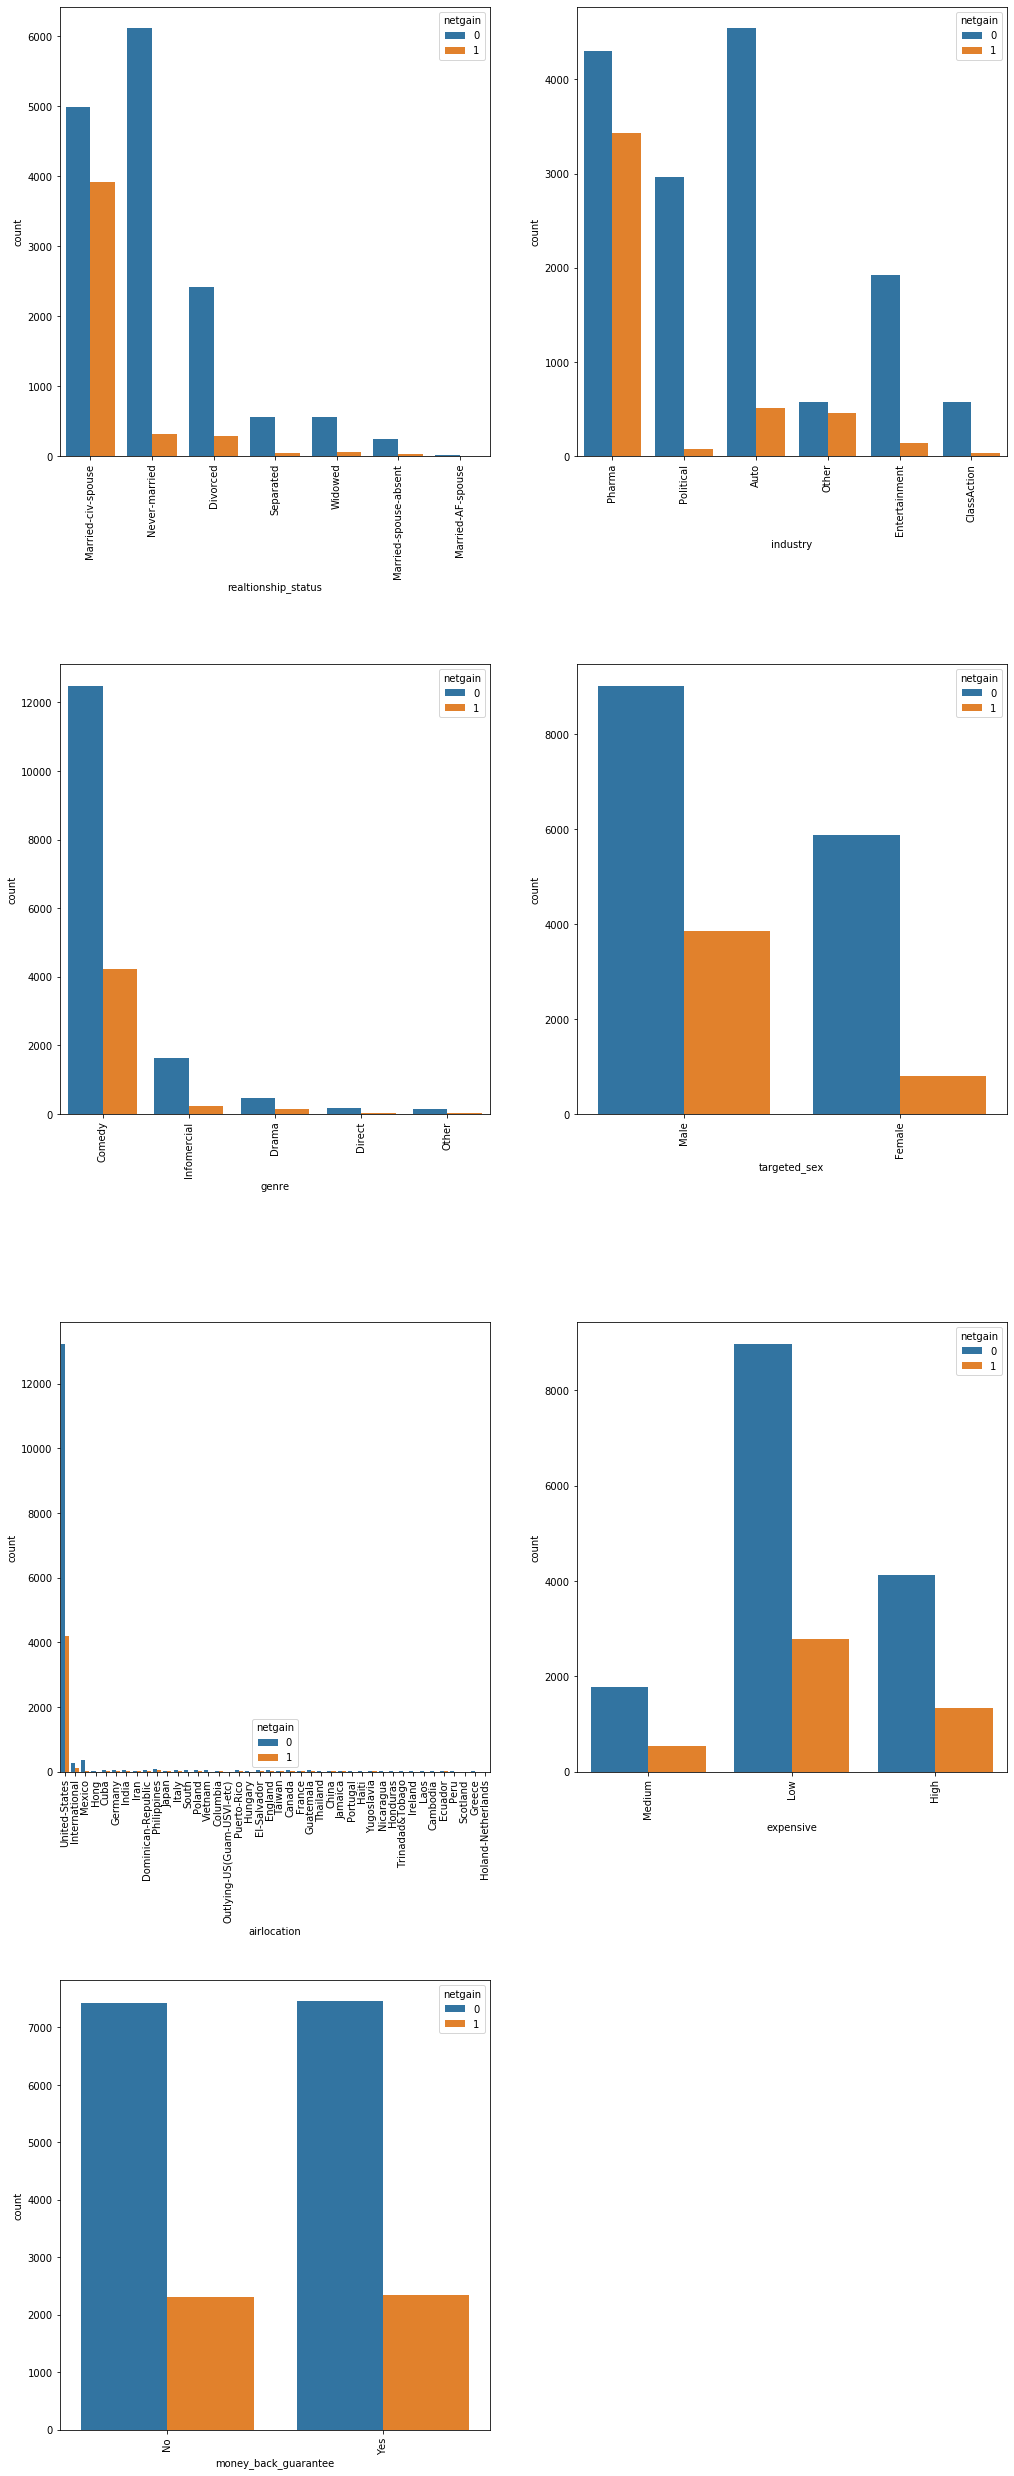

In [186]:
plt.figure(figsize = (15,35))
for i in enumerate(categorical):
    plt.subplot(4,2,i[0]+1)
    plt.tight_layout(pad=4.0)
    sns.countplot(x=i[1],hue='netgain',data=df_train)
    plt.xticks(rotation=90)
plt.show()
    

### Step 4 : Data Preparation

In [187]:
## lets use the value counts to inspect the various columns
df_train.realtionship_status.value_counts()

Married-civ-spouse       8899
Never-married            6433
Divorced                 2700
Widowed                   616
Separated                 598
Married-spouse-absent     274
Married-AF-spouse          16
Name: realtionship_status, dtype: int64

In [188]:
df_train.industry.value_counts()

Pharma           7735
Auto             5058
Political        3039
Entertainment    2064
Other            1031
ClassAction       609
Name: industry, dtype: int64

In [189]:
df_train.genre.value_counts()

Comedy         16699
Infomercial     1871
Drama            612
Direct           186
Other            168
Name: genre, dtype: int64

In [190]:
df_train.targeted_sex.value_counts()

Male      12869
Female     6667
Name: targeted_sex, dtype: int64

In [191]:
df_train.airtime.value_counts()

Primetime    11755
Morning       6397
Daytime       1384
Name: airtime, dtype: int64

In [192]:
df_train.airlocation.value_counts(normalize=True)

United-States                 0.892404
Mexico                        0.020168
International                 0.018172
Philippines                   0.005733
Germany                       0.003839
Cuba                          0.003481
Puerto-Rico                   0.003327
Canada                        0.003327
El-Salvador                   0.003276
India                         0.003174
England                       0.002867
Italy                         0.002662
Guatemala                     0.002559
South                         0.002457
Dominican-Republic            0.002406
Poland                        0.002406
Jamaica                       0.002355
Vietnam                       0.002303
Columbia                      0.002150
Japan                         0.001945
China                         0.001843
Iran                          0.001587
Taiwan                        0.001484
Haiti                         0.001331
Ecuador                       0.001280
Nicaragua                

We can infer  from above that the most of the advertisement have airlocation from USA  (almost 90%). Thus in such case we can have other group comprising of all other countries. 

In [193]:
#for lead source
impute_list = ['International','Philippines','Germany','Cuba','Canada','Puerto-Rico','El-Salvador','India','England','Italy','Guatemala','South','Dominican-Republic','Poland','Jamaica','Vietnam','Columbia','Japan','China','Iran','Taiwan','Haiti','Ecuador','Nicaragua','Portugal','Peru','France','Yugoslavia','Trinadad&Tobago','Ireland','Hong','Laos','Cambodia',
'Greece','Honduras','Mexico',
'Thailand','Hungary','Outlying-US(Guam-USVI-etc)','Scotland','Holand-Netherlands']

for i in impute_list:
    df_train['airlocation'].replace(to_replace=i,value='other',inplace=True)

In [194]:
df_train.airlocation.value_counts()

United-States    17434
other             2102
Name: airlocation, dtype: int64

In [195]:
df_train.expensive.value_counts()

Low       11756
High       5453
Medium     2327
Name: expensive, dtype: int64

In [196]:
df_train.money_back_guarantee.value_counts()

Yes    9788
No     9748
Name: money_back_guarantee, dtype: int64

In [197]:
# There are two binary variables. Lets map them with 0 and 1

# List of variables to map
# targeted_sex and money_back_guarante

df_train['money_back_guarantee'] = df_train['money_back_guarantee'].map({'Yes' :1 ,'No':0})
df_train['targeted_sex'] = df_train['targeted_sex'].map({'Female' :1 ,'Male':0})
df_train['airlocation'] = df_train['airlocation'].map({'United-States' :1 ,'other':0})


In [198]:
df_train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,0,40,Daytime,1,0.027465,Medium,0,0
1,UI_449,Never-married,Political,Comedy,0,35,Morning,0,0.027465,Low,0,0
2,UI_9014,Never-married,Auto,Comedy,0,40,Morning,1,0.027465,Low,0,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,0,40,Primetime,1,0.027465,Low,1,0
4,UI_25532,Married-civ-spouse,Other,Comedy,1,50,Primetime,1,0.027465,Low,1,1


For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [199]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_train[['realtionship_status', 'industry', 'genre', 'expensive','airtime']], drop_first=True)

# Adding the results to the master dataframe
df_train = pd.concat([df_train, dummy1], axis=1)

In [200]:
df_train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,...,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,expensive_Low,expensive_Medium,airtime_Morning,airtime_Primetime
0,UI_9185,Married-civ-spouse,Pharma,Comedy,0,40,Daytime,1,0.027465,Medium,...,1,0,0,0,0,0,0,1,0,0
1,UI_449,Never-married,Political,Comedy,0,35,Morning,0,0.027465,Low,...,0,1,0,0,0,0,1,0,1,0
2,UI_9014,Never-married,Auto,Comedy,0,40,Morning,1,0.027465,Low,...,0,0,0,0,0,0,1,0,1,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,0,40,Primetime,1,0.027465,Low,...,1,0,0,0,1,0,1,0,0,1
4,UI_25532,Married-civ-spouse,Other,Comedy,1,50,Primetime,1,0.027465,Low,...,0,0,0,0,0,0,1,0,0,1


In [201]:
# We have created dummies for the below variables, so we can drop them
df_train = df_train.drop(['realtionship_status', 'industry', 'genre', 'expensive','airtime'], 1)

In [202]:
df_train.head()

,UserID,targeted_sex,average_runtime(minutes_per_week),airlocation,ratings,money_back_guarantee,netgain,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,...,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,expensive_Low,expensive_Medium,airtime_Morning,airtime_Primetime
0,UI_9185,0,40,1,0.027465,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,UI_449,0,35,0,0.027465,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,UI_9014,0,40,1,0.027465,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,UI_14987,0,40,1,0.027465,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
4,UI_25532,1,50,1,0.027465,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### Checking outliers

In [203]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_train[['average_runtime(minutes_per_week)','ratings']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,average_runtime(minutes_per_week),ratings
count,19536.000000,19536.000000
mean,40.375665,0.038826
std,12.483166,0.075971
min,1.000000,0.000000
25%,40.000000,0.027465
50%,40.000000,0.027465
75%,45.000000,0.027465
90%,55.000000,0.027465
95%,60.000000,0.077823
99%,80.000000,0.173580


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

### Step 5 : Feature scaling and correlations

In [204]:
# Putting feature variable to X
from sklearn.model_selection import train_test_split
X = df_train.drop(['netgain','UserID'], axis=1)

X.head()

,targeted_sex,average_runtime(minutes_per_week),airlocation,ratings,money_back_guarantee,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,...,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,expensive_Low,expensive_Medium,airtime_Morning,airtime_Primetime
0,0,40,1,0.027465,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,35,0,0.027465,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,0,40,1,0.027465,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,40,1,0.027465,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1
4,1,50,1,0.027465,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [205]:
# Putting response variable to y
y = df_train['netgain']

y.head()

0    0
1    0
2    0
3    0
4    1
Name: netgain, dtype: int64

In [206]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['average_runtime(minutes_per_week)','ratings']] = scaler.fit_transform(X_train[['average_runtime(minutes_per_week)','ratings']])

X_train.head()

C:\Users\deepti\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\deepti\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,targeted_sex,average_runtime(minutes_per_week),airlocation,ratings,money_back_guarantee,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,...,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,expensive_Low,expensive_Medium,airtime_Morning,airtime_Primetime
10930,1,1.575201,1,1.033728,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2880,1,-0.035639,1,-0.151078,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
10567,1,1.172491,1,-0.151078,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2359,0,-0.035639,1,-0.151078,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
13850,0,-1.968647,1,-0.151078,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


In [208]:
### Checking the Churn Rate
net_gain = (sum(df_train['netgain'])/len(df_train['netgain'].index))*100
net_gain

23.8022113022113

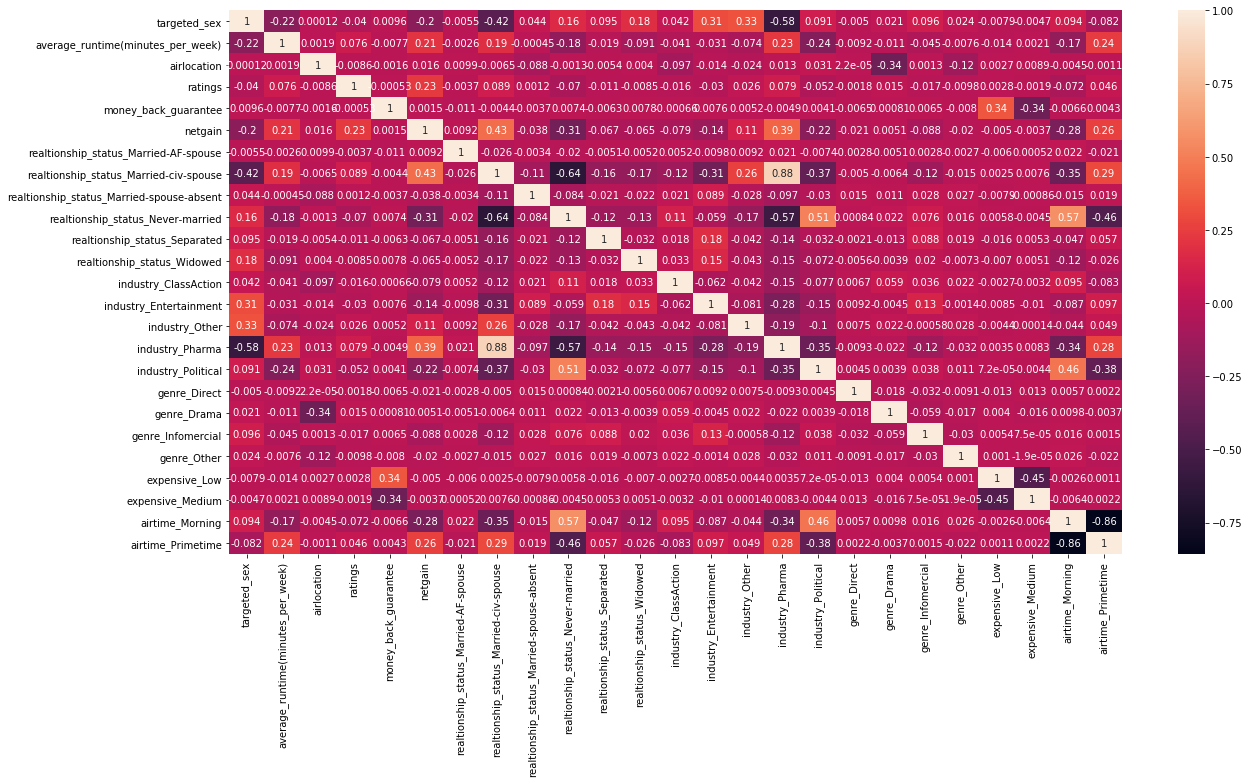

In [209]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_train.corr(),annot = True)
plt.show()

### Step 6 : Model Building 

## LOGISTIC REGRESSION

Feature Selection Using RFE

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [53]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [54]:
rfe.support_


array([ True,  True, False,  True, False,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True])

In [55]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('targeted_sex', True, 1),
 ('average_runtime(minutes_per_week)', True, 1),
 ('airlocation', False, 3),
 ('ratings', True, 1),
 ('money_back_guarantee', False, 8),
 ('realtionship_status_Married-AF-spouse', True, 1),
 ('realtionship_status_Married-civ-spouse', True, 1),
 ('realtionship_status_Married-spouse-absent', False, 10),
 ('realtionship_status_Never-married', False, 5),
 ('realtionship_status_Separated', False, 4),
 ('realtionship_status_Widowed', False, 7),
 ('industry_ClassAction', True, 1),
 ('industry_Entertainment', True, 1),
 ('industry_Other', True, 1),
 ('industry_Pharma', True, 1),
 ('industry_Political', True, 1),
 ('genre_Direct', True, 1),
 ('genre_Drama', False, 2),
 ('genre_Infomercial', True, 1),
 ('genre_Other', True, 1),
 ('expensive_Low', False, 6),
 ('expensive_Medium', False, 9),
 ('airtime_Morning', True, 1),
 ('airtime_Primetime', True, 1)]

In [214]:
col = X_train.columns[rfe.support_]

In [215]:
X_train.columns[~rfe.support_]

Index(['airlocation', 'money_back_guarantee',
       'realtionship_status_Married-spouse-absent',
       'realtionship_status_Never-married', 'realtionship_status_Separated',
       'realtionship_status_Widowed', 'genre_Drama', 'expensive_Low',
       'expensive_Medium'],
      dtype='object')

In [216]:
## Assessing the model with stats
import statsmodels.api as sm

In [217]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                netgain   No. Observations:                13675
Model:                            GLM   Df Residuals:                    13659
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5251.7
Date:                Tue, 08 Dec 2020   Deviance:                       10503.
Time:                        03:35:38   Pearson chi2:                 7.27e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.0638      0.113    -18.191      0.000      -2.286      -1.841
targeted_sex                              -0.2653      0.104     -2.543      0.011      -0.470      -0.061
average_runtime(minutes_per_week)          0.3593      0.027     13.296      0.000       0.306       0.412
ratings                                    2.0354      0.093     21.929      0.000       1.853       2.217
realtionship_status_Married-AF-spouse      2.1995      0.732      3.003      0.003       0.764       3.635
realtionship_status_Married-civ-spouse     1.0554      0.348      3.033      0.002       0.373       1.737
industry_ClassAction                      -0.6565      0.270     -2.433      0.015      -1.185      -0.128
industry_Entertainment                    -0.2423      0.130     -1.868      0.062      -0.496       0.012
industry_Other                             1.2470      0.368      3.385      0.001       0.525       1.969
industry_Pharma                            0.6654      0.356      1.870      0.061      -0.032       1.363
industry_Political                        -0.9883      0.182     -5.418      0.000      -1.346      -0.631
genre_Direct                              -0.5279      0.290     -1.822      0.068      -1.096       0.040
genre_Infomercial                         -0.4680      0.104     -4.513      0.000      -0.671      -0.265
genre_Other                               -0.3726      0.304     -1.227      0.220      -0.968       0.223
airtime_Morning                           -0.8248      0.112     -7.357      0.000      -1.045      -0.605
airtime_Primetime                          0.3015      0.092      3.295      0.001       0.122       0.481
==========================================================================================================
"""

In [218]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]


array([0.65531124, 0.08723139, 0.04564751, 0.03883275, 0.02263133,
       0.28076787, 0.41051455, 0.110799  , 0.04912954, 0.07469443])

In [219]:
y_train_pred_final = pd.DataFrame({'Netgain':y_train.values, 'Netgain_Prob':y_train_pred})
y_train_pred_final['UserID'] = y_train.index
y_train_pred_final.head()


,Netgain,Netgain_Prob,UserID
0,1,0.655311,10930
1,0,0.087231,2880
2,0,0.045648,10567
3,0,0.038833,2359
4,0,0.022631,13850


In [220]:

y_train_pred_final['Netgain_Prob'] = y_train_pred
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Netgain_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Netgain,Netgain_Prob,UserID,predicted
0,1,0.655311,10930,1
1,0,0.087231,2880,0
2,0,0.045648,10567,0
3,0,0.038833,2359,0
4,0,0.022631,13850,0


In [221]:
from sklearn import metrics

In [222]:
 #Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Netgain, y_train_pred_final.predicted )
print(confusion)

[[9965  442]
 [2243 1025]]


In [223]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Netgain, y_train_pred_final.predicted))

0.8036563071297989


 However while looking at the model we have one variable has p value gretaer than 15, therefore we need to drop that variable and run the model again. The variable  genre_Drama has the highest p value. So let's start by dropping that.

In [224]:
col = col.drop('genre_Other', 1)
col

Index(['targeted_sex', 'average_runtime(minutes_per_week)', 'ratings',
       'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Direct', 'genre_Infomercial',
       'airtime_Morning', 'airtime_Primetime'],
      dtype='object')

In [225]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                netgain   No. Observations:                13675
Model:                            GLM   Df Residuals:                    13660
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5252.5
Date:                Tue, 08 Dec 2020   Deviance:                       10505.
Time:                        03:35:38   Pearson chi2:                 7.14e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.0684      0.113    -18.244      0.000      -2.291      -1.846
targeted_sex                              -0.2643      0.104     -2.533      0.011      -0.469      -0.060
average_runtime(minutes_per_week)          0.3590      0.027     13.288      0.000       0.306       0.412
ratings                                    2.0343      0.093     21.921      0.000       1.852       2.216
realtionship_status_Married-AF-spouse      2.1903      0.732      2.990      0.003       0.755       3.626
realtionship_status_Married-civ-spouse     1.0436      0.348      3.001      0.003       0.362       1.725
industry_ClassAction                      -0.6594      0.270     -2.443      0.015      -1.188      -0.130
industry_Entertainment                    -0.2423      0.130     -1.868      0.062      -0.496       0.012
industry_Other                             1.2552      0.368      3.409      0.001       0.534       1.977
industry_Pharma                            0.6792      0.356      1.910      0.056      -0.018       1.376
industry_Political                        -0.9893      0.183     -5.419      0.000      -1.347      -0.632
genre_Direct                              -0.5250      0.290     -1.812      0.070      -1.093       0.043
genre_Infomercial                         -0.4647      0.104     -4.483      0.000      -0.668      -0.262
airtime_Morning                           -0.8244      0.112     -7.354      0.000      -1.044      -0.605
airtime_Primetime                          0.3023      0.091      3.304      0.001       0.123       0.482
==========================================================================================================
"""

In [226]:
 #Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,realtionship_status_Married-civ-spouse,63.93
8,industry_Pharma,57.99
7,industry_Other,8.47
13,airtime_Primetime,3.48
0,targeted_sex,2.37
12,airtime_Morning,2.36
9,industry_Political,1.86
6,industry_Entertainment,1.48
5,industry_ClassAction,1.18
1,average_runtime(minutes_per_week),1.15


The above analysis shows that genre_direct has very high p value . Lets drop this variable 

In [227]:
col = col.drop('genre_Direct', 1)
col

Index(['targeted_sex', 'average_runtime(minutes_per_week)', 'ratings',
       'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Infomercial', 'airtime_Morning',
       'airtime_Primetime'],
      dtype='object')

In [228]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                netgain   No. Observations:                13675
Model:                            GLM   Df Residuals:                    13661
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5254.3
Date:                Tue, 08 Dec 2020   Deviance:                       10509.
Time:                        03:35:39   Pearson chi2:                 7.03e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.0739      0.113    -18.296      0.000      -2.296      -1.852
targeted_sex                              -0.2589      0.104     -2.483      0.013      -0.463      -0.055
average_runtime(minutes_per_week)          0.3604      0.027     13.350      0.000       0.307       0.413
ratings                                    2.0339      0.093     21.918      0.000       1.852       2.216
realtionship_status_Married-AF-spouse      2.1992      0.732      3.003      0.003       0.764       3.635
realtionship_status_Married-civ-spouse     1.0493      0.348      3.019      0.003       0.368       1.730
industry_ClassAction                      -0.6637      0.270     -2.461      0.014      -1.192      -0.135
industry_Entertainment                    -0.2450      0.130     -1.890      0.059      -0.499       0.009
industry_Other                             1.2464      0.368      3.388      0.001       0.525       1.968
industry_Pharma                            0.6765      0.355      1.903      0.057      -0.020       1.373
industry_Political                        -0.9892      0.183     -5.418      0.000      -1.347      -0.631
genre_Infomercial                         -0.4597      0.104     -4.436      0.000      -0.663      -0.257
airtime_Morning                           -0.8268      0.112     -7.377      0.000      -1.046      -0.607
airtime_Primetime                          0.3001      0.091      3.281      0.001       0.121       0.479
==========================================================================================================
"""

In [229]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,realtionship_status_Married-civ-spouse,63.93
8,industry_Pharma,57.99
7,industry_Other,8.47
12,airtime_Primetime,3.47
0,targeted_sex,2.37
11,airtime_Morning,2.36
9,industry_Political,1.86
6,industry_Entertainment,1.48
5,industry_ClassAction,1.18
1,average_runtime(minutes_per_week),1.15


However while looking at the model we have variable realtionship_status_Married-civ-spouse has p value gretaer than 5, therefore we need to drop that variable and run the model again.  So let's start by dropping that.

In [230]:
col = col.drop('realtionship_status_Married-civ-spouse', 1)
col

Index(['targeted_sex', 'average_runtime(minutes_per_week)', 'ratings',
       'realtionship_status_Married-AF-spouse', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Infomercial', 'airtime_Morning',
       'airtime_Primetime'],
      dtype='object')

In [231]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                netgain   No. Observations:                13675
Model:                            GLM   Df Residuals:                    13662
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5258.2
Date:                Tue, 08 Dec 2020   Deviance:                       10516.
Time:                        03:35:39   Pearson chi2:                 1.05e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0680      0.113    -18.250      0.000      -2.290      -1.846
targeted_sex                             -0.2638      0.104     -2.533      0.011      -0.468      -0.060
average_runtime(minutes_per_week)         0.3605      0.027     13.356      0.000       0.308       0.413
ratings                                   2.0468      0.093     21.920      0.000       1.864       2.230
realtionship_status_Married-AF-spouse     1.1811      0.658      1.794      0.073      -0.109       2.471
industry_ClassAction                     -0.4356      0.248     -1.759      0.079      -0.921       0.050
industry_Entertainment                   -0.2463      0.130     -1.900      0.057      -0.501       0.008
industry_Other                            2.2970      0.120     19.110      0.000       2.061       2.533
industry_Pharma                           1.7216      0.082     20.946      0.000       1.561       1.883
industry_Political                       -0.8898      0.176     -5.054      0.000      -1.235      -0.545
genre_Infomercial                        -0.4603      0.104     -4.443      0.000      -0.663      -0.257
airtime_Morning                          -0.8354      0.112     -7.453      0.000      -1.055      -0.616
airtime_Primetime                         0.3005      0.091      3.286      0.001       0.121       0.480
=========================================================================================================
"""

In [232]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,airtime_Primetime,3.47
7,industry_Pharma,2.60
0,targeted_sex,2.37
10,airtime_Morning,2.36
8,industry_Political,1.84
5,industry_Entertainment,1.48
6,industry_Other,1.31
1,average_runtime(minutes_per_week),1.15
9,genre_Infomercial,1.14
4,industry_ClassAction,1.12


In [233]:
col = col.drop('realtionship_status_Married-AF-spouse', 1)
col

Index(['targeted_sex', 'average_runtime(minutes_per_week)', 'ratings',
       'industry_ClassAction', 'industry_Entertainment', 'industry_Other',
       'industry_Pharma', 'industry_Political', 'genre_Infomercial',
       'airtime_Morning', 'airtime_Primetime'],
      dtype='object')

In [234]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                netgain   No. Observations:                13675
Model:                            GLM   Df Residuals:                    13663
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5259.7
Date:                Tue, 08 Dec 2020   Deviance:                       10519.
Time:                        03:35:39   Pearson chi2:                 1.04e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.0706      0.113    -18.273      0.000      -2.293      -1.848
targeted_sex                         -0.2631      0.104     -2.526      0.012      -0.467      -0.059
average_runtime(minutes_per_week)     0.3608      0.027     13.369      0.000       0.308       0.414
ratings                               2.0459      0.093     21.916      0.000       1.863       2.229
industry_ClassAction                 -0.4368      0.248     -1.764      0.078      -0.922       0.049
industry_Entertainment               -0.2461      0.130     -1.898      0.058      -0.500       0.008
industry_Other                        2.2998      0.120     19.141      0.000       2.064       2.535
industry_Pharma                       1.7245      0.082     20.987      0.000       1.563       1.886
industry_Political                   -0.8926      0.176     -5.070      0.000      -1.238      -0.548
genre_Infomercial                    -0.4553      0.103     -4.402      0.000      -0.658      -0.253
airtime_Morning                      -0.8262      0.112     -7.384      0.000      -1.046      -0.607
airtime_Primetime                     0.3006      0.091      3.287      0.001       0.121       0.480
=====================================================================================================
"""

In [235]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,airtime_Primetime,3.47
6,industry_Pharma,2.60
0,targeted_sex,2.37
9,airtime_Morning,2.35
7,industry_Political,1.84
4,industry_Entertainment,1.48
5,industry_Other,1.31
1,average_runtime(minutes_per_week),1.15
8,genre_Infomercial,1.14
3,industry_ClassAction,1.12


In [236]:
col = col.drop('industry_ClassAction', 1)
col

Index(['targeted_sex', 'average_runtime(minutes_per_week)', 'ratings',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Infomercial', 'airtime_Morning',
       'airtime_Primetime'],
      dtype='object')

In [237]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                netgain   No. Observations:                13675
Model:                            GLM   Df Residuals:                    13664
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5261.5
Date:                Tue, 08 Dec 2020   Deviance:                       10523.
Time:                        03:35:40   Pearson chi2:                 1.56e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.1016      0.112    -18.709      0.000      -2.322      -1.881
targeted_sex                         -0.2626      0.104     -2.523      0.012      -0.467      -0.059
average_runtime(minutes_per_week)     0.3620      0.027     13.415      0.000       0.309       0.415
ratings                               2.0464      0.093     21.908      0.000       1.863       2.229
industry_Entertainment               -0.2134      0.129     -1.658      0.097      -0.466       0.039
industry_Other                        2.3330      0.119     19.594      0.000       2.100       2.566
industry_Pharma                       1.7568      0.081     21.787      0.000       1.599       1.915
industry_Political                   -0.8573      0.175     -4.894      0.000      -1.201      -0.514
genre_Infomercial                    -0.4606      0.103     -4.455      0.000      -0.663      -0.258
airtime_Morning                      -0.8323      0.112     -7.440      0.000      -1.051      -0.613
airtime_Primetime                     0.2997      0.092      3.275      0.001       0.120       0.479
=====================================================================================================
"""

In [238]:
col = col.drop('industry_Entertainment', 1)
col

Index(['targeted_sex', 'average_runtime(minutes_per_week)', 'ratings',
       'industry_Other', 'industry_Pharma', 'industry_Political',
       'genre_Infomercial', 'airtime_Morning', 'airtime_Primetime'],
      dtype='object')

In [239]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                netgain   No. Observations:                13675
Model:                            GLM   Df Residuals:                    13665
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5262.9
Date:                Tue, 08 Dec 2020   Deviance:                       10526.
Time:                        03:35:40   Pearson chi2:                 1.55e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.1304      0.111    -19.152      0.000      -2.348      -1.912
targeted_sex                         -0.3044      0.101     -3.006      0.003      -0.503      -0.106
average_runtime(minutes_per_week)     0.3630      0.027     13.447      0.000       0.310       0.416
ratings                               2.0490      0.093     21.969      0.000       1.866       2.232
industry_Other                        2.4082      0.111     21.689      0.000       2.191       2.626
industry_Pharma                       1.7894      0.079     22.779      0.000       1.635       1.943
industry_Political                   -0.8122      0.173     -4.684      0.000      -1.152      -0.472
genre_Infomercial                    -0.4693      0.103     -4.552      0.000      -0.671      -0.267
airtime_Morning                      -0.8306      0.112     -7.419      0.000      -1.050      -0.611
airtime_Primetime                     0.2953      0.092      3.225      0.001       0.116       0.475
=====================================================================================================
"""

In [240]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,airtime_Primetime,3.10
4,industry_Pharma,2.41
0,targeted_sex,2.22
7,airtime_Morning,2.15
5,industry_Political,1.67
3,industry_Other,1.21
1,average_runtime(minutes_per_week),1.15
6,genre_Infomercial,1.12
2,ratings,1.01


This would be final model where we habe all p value under 1% and VIF under 3. 

In [241]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [242]:
y_train_pred[:10]

array([0.63421488, 0.07856239, 0.04111678, 0.03614174, 0.02480645,
       0.27828491, 0.40896115, 0.10361922, 0.0457539 , 0.06938435])

In [243]:
y_train_pred_final['Netgain_Prob'] = y_train_pred

In [244]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Netgain_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Netgain,Netgain_Prob,UserID,predicted
0,1,0.634215,10930,1
1,0,0.078562,2880,0
2,0,0.041117,10567,0
3,0,0.036142,2359,0
4,0,0.024806,13850,0


In [245]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Netgain, y_train_pred_final.predicted))

0.8032906764168191


The accuracy is practical the same.

In [246]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Netgain, y_train_pred_final.predicted )
print(confusion)

[[9961  446]
 [2244 1024]]


### Step 6: Potting the ROC curve

In [247]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [248]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Netgain, y_train_pred_final.Netgain_Prob, drop_intermediate = False )

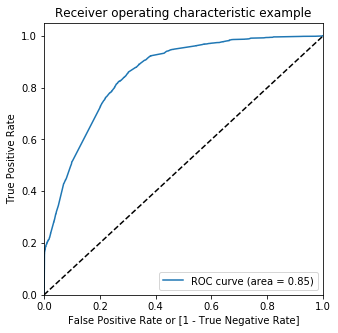

In [249]:
draw_roc(y_train_pred_final.Netgain, y_train_pred_final.Netgain_Prob)

### Step 7 : Finding the optimal point

In [250]:
 #Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Netgain_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Netgain,Netgain_Prob,UserID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.634215,10930,1,1,1,1,1,1,1,1,0,0,0
1,0,0.078562,2880,0,1,0,0,0,0,0,0,0,0,0
2,0,0.041117,10567,0,1,0,0,0,0,0,0,0,0,0
3,0,0.036142,2359,0,1,0,0,0,0,0,0,0,0,0
4,0,0.024806,13850,0,1,0,0,0,0,0,0,0,0,0


In [251]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Netgain, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.238976  1.000000  0.000000
0.1   0.1  0.652285  0.940636  0.561737
0.2   0.2  0.738355  0.854345  0.701931
0.3   0.3  0.760293  0.799878  0.747862
0.4   0.4  0.781499  0.729498  0.797828
0.5   0.5  0.803291  0.313341  0.957144
0.6   0.6  0.798830  0.222154  0.979917
0.7   0.7  0.801316  0.193084  0.992313
0.8   0.8  0.798172  0.160955  0.998270
0.9   0.9  0.783108  0.095165  0.999135


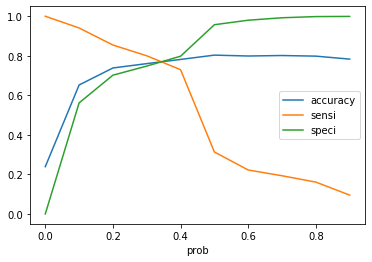

In [252]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [253]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Netgain_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Netgain,Netgain_Prob,UserID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.634215,10930,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.078562,2880,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.041117,10567,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.036142,2359,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.024806,13850,0,1,0,0,0,0,0,0,0,0,0,0


In [254]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Netgain, y_train_pred_final.final_predicted)

0.7602925045703839

In [255]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Netgain, y_train_pred_final.final_predicted )
confusion2

array([[7783, 2624],
       [ 654, 2614]], dtype=int64)

In [256]:
from sklearn.metrics import precision_score, recall_score


In [257]:
print(precision_score(y_train_pred_final.Netgain, y_train_pred_final.predicted))
print(recall_score(y_train_pred_final.Netgain, y_train_pred_final.predicted))


0.6965986394557823
0.31334149326805383


In [258]:

#  F1 = 2 * (precision * recall) / (precision + recall) 
F1_score = 2 *(0.69 * 0.31)/(0.69+0.31)
print (F1_score)

0.42779999999999996


### Step 7: Making predictions on the test set

In [259]:
X_test[['average_runtime(minutes_per_week)','ratings']] = scaler.transform(X_test[['average_runtime(minutes_per_week)','ratings']])

X_test.head()

C:\Users\deepti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\deepti\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,targeted_sex,average_runtime(minutes_per_week),airlocation,ratings,money_back_guarantee,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,...,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,expensive_Low,expensive_Medium,airtime_Morning,airtime_Primetime
7786,1,0.769781,1,-0.151078,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
15394,0,0.769781,1,-0.151078,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2234,1,-0.438349,1,-0.151078,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2843,0,-0.035639,1,-0.151078,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
9872,1,0.608697,1,-0.151078,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [260]:
X_test = X_test[col]
X_test.head()

,targeted_sex,average_runtime(minutes_per_week),ratings,industry_Other,industry_Pharma,industry_Political,genre_Infomercial,airtime_Morning,airtime_Primetime
7786,1,0.769781,-0.151078,1,0,0,1,1,0
15394,0,0.769781,-0.151078,0,0,1,0,1,0
2234,1,-0.438349,-0.151078,0,0,0,0,1,0
2843,0,-0.035639,-0.151078,0,0,0,1,1,0
9872,1,0.608697,-0.151078,0,0,0,0,0,1


In [261]:
X_test_sm = sm.add_constant(X_test)

In [262]:
y_test_pred = res.predict(X_test_sm)

In [263]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
7786,0.204778
15394,0.021810
2234,0.023338
2843,0.022914
9872,0.097251


In [264]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [265]:
# Putting CustID to index
y_test_df['UserID'] = y_test_df.index

In [266]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [267]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,netgain,UserID,0
0,1,7786,0.204778
1,0,15394,0.021810
2,0,2234,0.023338
3,0,2843,0.022914
4,0,9872,0.097251


In [268]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Netgain_Prob'})

In [269]:
# Rearranging the columns
y_pred_final = y_pred_final[['UserID','netgain','Netgain_Prob']]

In [270]:
# Let's see the head of y_pred_final
y_pred_final.head()

,UserID,netgain,Netgain_Prob
0,7786,1,0.204778
1,15394,0,0.021810
2,2234,0,0.023338
3,2843,0,0.022914
4,9872,0,0.097251


In [271]:
y_pred_final['final_predicted'] = y_pred_final.Netgain_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [272]:
y_pred_final.head()

,UserID,netgain,Netgain_Prob,final_predicted
0,7786,1,0.204778,0
1,15394,0,0.021810,0
2,2234,0,0.023338,0
3,2843,0,0.022914,0
4,9872,0,0.097251,0


In [273]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.netgain, y_pred_final.final_predicted)

0.7734175055451288

In [274]:
print(precision_score(y_pred_final.netgain, y_pred_final.final_predicted))
print(recall_score(y_pred_final.netgain, y_pred_final.final_predicted))

0.5123287671232877
0.8118668596237337


In [275]:
#  F1 = 2 * (precision * recall) / (precision + recall) 
F1_score = 2 *(0.51 * 0.81)/(0.51 + 0.81)
print (F1_score)

0.6259090909090909


## DECISION TREE

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [277]:
X_train.shape, X_test.shape

((13675, 24), (5861, 24))

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [280]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [281]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [282]:
from sklearn.metrics import classification_report

In [283]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     10407
           1       0.66      0.47      0.55      3268

    accuracy                           0.82     13675
   macro avg       0.75      0.70      0.72     13675
weighted avg       0.80      0.82      0.80     13675



In [284]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4479
           1       0.65      0.47      0.54      1382

    accuracy                           0.82      5861
   macro avg       0.75      0.69      0.71      5861
weighted avg       0.80      0.82      0.80      5861



## PREDICTION ON THE TEST DATA

In [301]:
#for lead source
impute_list = ['International','Philippines','Germany','Cuba','Canada','Puerto-Rico','El-Salvador','India','England','Italy','Guatemala','South','Dominican-Republic','Poland','Jamaica','Vietnam','Columbia','Japan','China','Iran','Taiwan','Haiti','Ecuador','Nicaragua','Portugal','Peru','France','Yugoslavia','Trinadad&Tobago','Ireland','Hong','Laos','Cambodia',
'Greece','Honduras','Mexico',
'Thailand','Hungary','Outlying-US(Guam-USVI-etc)','Scotland','Holand-Netherlands']

for i in impute_list:
    df_test['airlocation'].replace(to_replace=i,value='other',inplace=True)

In [302]:
# There are three binary variables. Lets map them with 0 and 1

df_test['money_back_guarantee'] = df_test['money_back_guarantee'].map({'Yes' :1 ,'No':0})
df_test['targeted_sex'] = df_test['targeted_sex'].map({'Female' :1 ,'Male':0})
df_test['airlocation'] = df_test['airlocation'].map({'United-States' :1 ,'other':0})

In [303]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_test[['realtionship_status', 'industry', 'genre', 'expensive','airtime']], drop_first=True)

# Adding the results to the master dataframe
df_test = pd.concat([df_test, dummy1], axis=1)

In [304]:
# We have created dummies for the below variables, so we can drop them
df_test = df_test.drop(['realtionship_status', 'industry', 'genre', 'expensive','airtime'], 1)

In [305]:
X_test1=df_test[['targeted_sex', 'average_runtime(minutes_per_week)', 'airlocation',
       'ratings', 'money_back_guarantee',
       'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse',
       'realtionship_status_Married-spouse-absent',
       'realtionship_status_Never-married', 'realtionship_status_Separated',
       'realtionship_status_Widowed', 'industry_ClassAction',
       'industry_Entertainment', 'industry_Other', 'industry_Pharma',
       'industry_Political', 'genre_Direct', 'genre_Drama',
       'genre_Infomercial', 'genre_Other', 'expensive_Low', 'expensive_Medium',
       'airtime_Morning', 'airtime_Primetime']]

In [306]:
X_test1[['average_runtime(minutes_per_week)','ratings']] = scaler.transform(X_test1[['average_runtime(minutes_per_week)','ratings']])

X_test1.head()

C:\Users\deepti\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\deepti\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,targeted_sex,average_runtime(minutes_per_week),airlocation,ratings,money_back_guarantee,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,...,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,expensive_Low,expensive_Medium,airtime_Morning,airtime_Primetime
0,1,-0.035639,1,-0.151078,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,1,-0.035639,1,-0.151078,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,-0.035639,1,-0.151078,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,-0.841059,1,-0.151078,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,2.380621,1,-0.151078,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [307]:
X_test1.isnull().sum()

targeted_sex                                 0
average_runtime(minutes_per_week)            0
airlocation                                  0
ratings                                      0
money_back_guarantee                         0
realtionship_status_Married-AF-spouse        0
realtionship_status_Married-civ-spouse       0
realtionship_status_Married-spouse-absent    0
realtionship_status_Never-married            0
realtionship_status_Separated                0
realtionship_status_Widowed                  0
industry_ClassAction                         0
industry_Entertainment                       0
industry_Other                               0
industry_Pharma                              0
industry_Political                           0
genre_Direct                                 0
genre_Drama                                  0
genre_Infomercial                            0
genre_Other                                  0
expensive_Low                                0
expensive_Med

In [308]:

ypred_rf = dt_rf.predict(X_test1)

In [309]:

ypred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [316]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(ypred_rf)
# Let's see the head
y_pred_1.head()

,0
0,0
1,0
2,0
3,1
4,0


In [318]:
# Renaming the column 
y_pred_1= y_pred_1.rename(columns={ 0 : 'netgain'})

In [319]:
y_pred_1.head()

,netgain
0,0
1,0
2,0
3,1
4,0


In [321]:
y_pred_1.set_index('netgain', inplace=True)
print (y_pred_1)

Empty DataFrame
Columns: []
Index: [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...]

[6512 rows x 0 columns]


In [322]:
y_pred_1.to_csv("submission.csv")